# Plot mean HH profiles

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

import postproamrwindsample_xarray as ppsamplexr
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def loadpickle(picklefile):
    pfile          = open(picklefile, 'rb')
    ds             = pickle.load(pfile)
    pfile.close()
    return ds

In [3]:
rotorD = 127
zHH    = 90
x0     = 2000
y0     = 2560
writeoutputs = True
datadir= 'data_noturb/'

## Turbine hub-height

In [4]:
hhds = loadpickle('means_noturb/turbhh_avg.pkl')

(730.0, 4540.0, 2052.0, 3068.0)

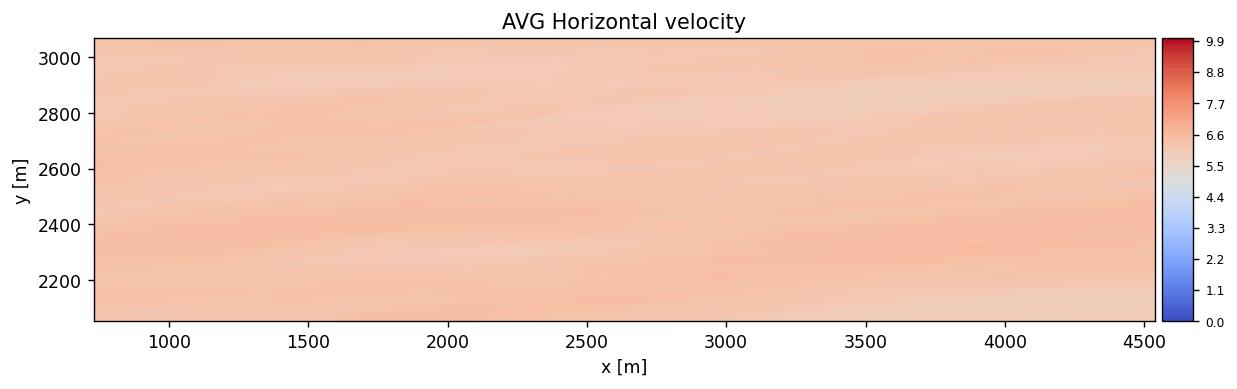

In [5]:
# Plot the turbine hub-height slice
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
clevels=np.linspace(0, 10,101)
iplane= 0

Uh=np.sqrt(hhds['velocityx_avg'][iplane,:,:]**2+hhds['velocityy_avg'][iplane,:,:]**2)
c=plt.contourf(hhds['x'][iplane,:,:], hhds['y'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('AVG Horizontal velocity')
ax.axis('scaled')

In [6]:
xm, ym = hhds['x'][iplane,:,:], hhds['y'][iplane,:,:]
xvec = xm[0,:]-x0
yvec = ym[:,0]-y0

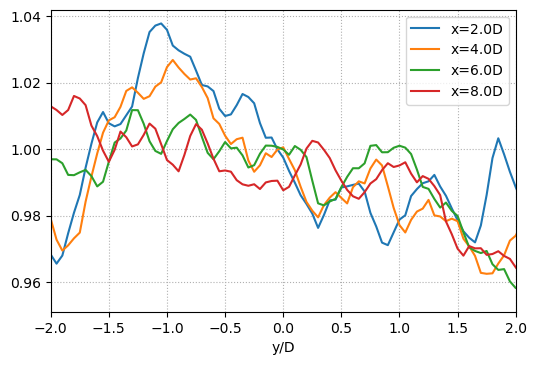

In [7]:
xtarget = [2, 4, 6, 8] 

plt.figure(figsize=(6,4), dpi=100)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    xD = xvec[idx]/rotorD
    plt.plot(yvec/rotorD, Uh[:,idx]/6.265, label=f'x={xD:0.1f}D')
    plt.xlim([-2, 2])
    plt.xlabel('y/D')
    plt.legend()
    plt.grid(ls=':')


In [8]:
U=hhds['velocityx_avg'][iplane,:,:]
V=hhds['velocityy_avg'][iplane,:,:]
W=hhds['velocityz_avg'][iplane,:,:]

xtarget = np.arange(-10,21,1)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    if writeoutputs:
        xD = xvec[idx]/rotorD
        savedat = np.vstack((yvec/rotorD, U[:,idx], V[:,idx], W[:,idx],))
        fname   = f'AMRWIND_HH_VEL_PROFILE_x_{xD:06.2f}D.dat'
        np.savetxt(datadir+'/'+fname, savedat.transpose(), header="Y/D U V W")

In [9]:
# Save plane to pickle file
if writeoutputs:
    dbfile = open('pklfiles/AMRWIND_HH_avgVEL.pkl', 'wb')
    pickle.dump({'X':hhds['x'][iplane,:,:], 'Y':hhds['y'][iplane,:,:], 'U':U, 'V':V, 'W':W, }, dbfile, protocol=2)
    dbfile.close()

(730.0, 4540.0, 2052.0, 3068.0)

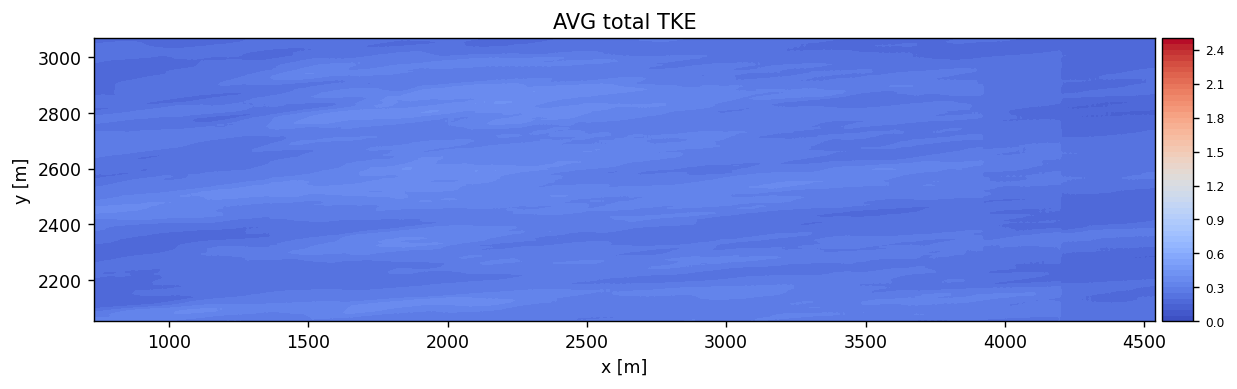

In [10]:
# Plot the turbine hub-height slice
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
klevels=np.linspace(0, 2.5,51)
iplane= 0
TKEres = 0.5*(hhds['uu_avg'][iplane,:,:] + hhds['vv_avg'][iplane,:,:] + hhds['ww_avg'][iplane,:,:])
TKEsgs = hhds['tke_avg'][iplane,:,:]
TKEtot = TKEres + TKEsgs
c=plt.contourf(hhds['x'][iplane,:,:], hhds['y'][iplane,:,:], TKEtot, levels=klevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('AVG total TKE')
ax.axis('scaled')

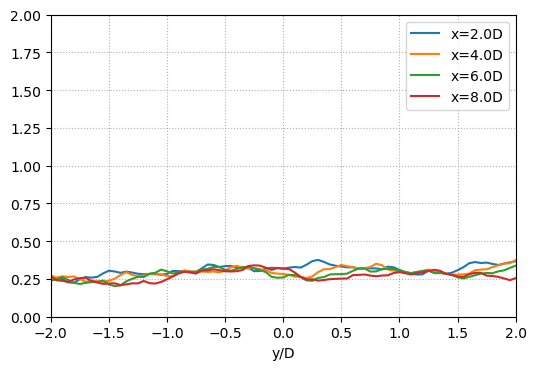

In [11]:
xtarget = [2, 4, 6, 8] 

plt.figure(figsize=(6,4), dpi=100)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    xD = xvec[idx]/rotorD
    plt.plot(yvec/rotorD, TKEtot[:,idx], label=f'x={xD:0.1f}D')

plt.xlim([-2, 2])
plt.ylim([0, 2])
plt.xlabel('y/D')
plt.legend()
plt.grid(ls=':')

In [12]:
xtarget = np.arange(-10,21,1)
for x in xtarget:
    idx = np.abs(xvec - x*rotorD).argmin()
    if writeoutputs:
        xD = xvec[idx]/rotorD
        savedat = np.vstack((yvec/rotorD, TKEres[:,idx], TKEsgs[:,idx], TKEtot[:,idx],))
        fname   = f'AMRWIND_HH_TKE_PROFILE_x_{xD:06.2f}D.dat'
        np.savetxt(datadir+'/'+fname, savedat.transpose(), header="Y/D TKEres TKEsgs TKEtot")